## Project Details

### **Credit Card Lead Prediction**

#### [Kaggle project reference site](https://www.kaggle.com/datasets/sajidhussain3/jobathon-may-2021-credit-card-lead-prediction)

 Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.



 The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 



 In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.



 Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)

 Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)



## Approach I explored.
1. Data Exploration

2. Label Encoder for ordinal categorical columns and one hot encoder for nominal variables.
3. The dataset is an unbalanced dataset,  187437 Customer is not interested and 58288 Customer is interested. 

    Hence, I used the SMOTE from imblearn.over_sampling library to upsample the class

4. Preprocessed the datset over a standard scaler to bring the distribution closer

5. Built the ML model using voting classifier which uses logistic regression and random forest as the two base sub model. 

    The voting classifier gave an accuracy of 0.77, the logistic model gave an accuracy of 0.75 and the random forest model with an accuracy of 0.76

6. Built a Xgboost Model that gave 0.76 accuaracy and F1 score of  0.84

7. Built a basic tensorflow Sequential model and avoided overfitting by calling early stopping. 

    The model gave and accuracy of: 0.8580 - mean squared error(mse) of : 0.0968 - and validation accuracy of : 0.7826 - validation_mse: 0.1465

## **Import useful Libraries and modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Import the data from local device**

In [2]:
from google.colab import files

uploaded = files.upload() #upload the data from local system to colab

Saving credit_test.csv to credit_test.csv
Saving credit_train.csv to credit_train.csv


In [3]:
# read the train data
train_set = pd.read_csv('credit_train.csv')

#read the test data

test_set = pd.read_csv('credit_test.csv')

## **EDA and Data Preprocessing**

In [4]:
# get the first 5 values of the train data in a table

train_set.head() #return the first 5 rows of the data set

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
# get the first 5 values of the test data in a table

test_set.head() #return the first 5 rows of the data set

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


## **Data Dictionary**

### **ID** : Unique Identifier for a row

### **Gender**: Gender of the Customer

### **Age**: Age of the Customer (in Years)

### **Region_Code**: Code of the Region for the customers

### **Occupation**: Occupation Type for the customer

### **Channel_Code**: Acquisition Channel Code for the Customer  (Encoded)

### **Vintage**: Vintage for the Customer (In Months)

### **Credit_Product**: If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)

### **Avg_Account_Balance**: Average Account Balance for the Customer in last 12 Months

### **Is_Active**: If the Customer is Active in last 3 Months

### **Is_Lead(Target)**: If the Customer is interested for the Credit Card

0 : Customer is not interested

1 : Customer is interested



In [6]:
train_set.info() #get the description of the train dataset

print(train_set.shape) #get the dimension of the dataset: the number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB
(245725, 11)


In [7]:
test_set.info() #get the description of the train dataset

print(test_set.shape) #get the dimension of the dataset: the number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB
(105312, 10)


In [8]:
train_set.describe() #numerically describing the characteristics of the dataset

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [9]:
test_set.describe() #numerically describing the characteristics of the dataset

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [10]:
train_set.isnull().sum() #checking the null values of each column of the dataset

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [11]:
test_set.isnull().sum() #checking the null values of each column of the dataset

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [12]:
cat_cols = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code ', 'Credit_Product', 'Is_Active'] #the columns with object values
 
num_cols = ['Age', 'Vintage', 'Avg_Account_Balance'] #the columns with numerical values

0    187437
1     58288
Name: Is_Lead, dtype: int64


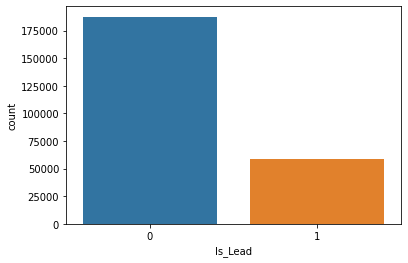

In [13]:
# check the target column of the train data to ensure we are working with a balanced dataset

print(train_set['Is_Lead'].value_counts())

sns.countplot(x= train_set.Is_Lead)

# we might have to treat the train data has an imbalanced data set and resample it to ensure our model isn't bias

In [14]:
# let's get the value count for each of the categorical columns

print(train_set['Gender'].value_counts()) #to check the gender distribution

print(train_set['Region_Code'].value_counts()) #to get how many different region are there and how many samples per region

print(train_set['Occupation'].value_counts()) #to get the counts of the occupation

print(train_set['Channel_Code'].value_counts()) #to get how many different channel codes are there and how many samples per channel

print(train_set['Credit_Product'].value_counts()) #to get the counts of those that have credit products or not

print(train_set['Is_Active'].value_counts()) #to get the counts of those that are active or not

Male      134197
Female    111528
Name: Gender, dtype: int64
RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64
Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64
X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64
No     144357
Yes     72043
Name: Credit_Product, dtype: int64
No     150290
Yes     95435
Name: Is_Active, dtype: int64


### Encoding Categorical Variable

#### Label encoder will be used on the gender, occupation, credit product, Channel code and Is active column. While one hot encoding will be used for the other columns

Ordinal categorical variables are categorical variables that have some kind of logical ordering between its values e.g grades and Label encoding is best suited for them.

If there is a lack of any kind of logical ordering between the values of the categorical variable we call it a nominal variable.
One-hot encoding and it is best suited for nominal variables. While using one-hot encoding we create a new variable for each variable value.

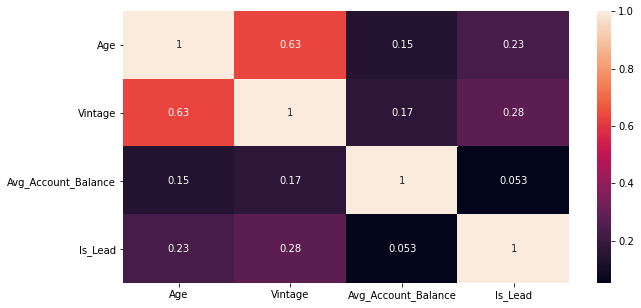

In [15]:
#plotiing  to see the realtionships between the features and the target

plt.figure(figsize = (10, 5))
sns.heatmap(train_set.corr(), annot = True)

#it will only plot for the columns with numerical values

#there isnt any high correlation of the features which can affect our model

In [16]:
#let's fill values for missing columns 

#for train data, just the Credit column has values missing

train_set['Credit_Product']= train_set['Credit_Product'].fillna(train_set['Credit_Product'].mode().iloc[0])


#and for the test data
test_set['Credit_Product']= test_set['Credit_Product'].fillna(test_set['Credit_Product'].mode().iloc[0])

### Label Encoding

In [17]:
# let's do encoding for the train data set

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_set["Gender"] = label_encoder.fit_transform(train_set["Gender"]) 
train_set["Occupation"] = label_encoder.fit_transform(train_set["Occupation"]) 
train_set["Credit_Product"] = label_encoder.fit_transform(train_set["Credit_Product"]) 
train_set["Is_Active"] = label_encoder.fit_transform(train_set["Is_Active"]) 
train_set.head()


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,RG268,1,X3,43,0,1045696,0,0
1,IDD62UNG,0,30,RG277,2,X1,32,0,581988,0,0
2,HD3DSEMC,0,56,RG268,3,X3,26,0,1484315,1,0
3,BF3NC7KV,1,34,RG270,2,X1,19,0,470454,0,0
4,TEASRWXV,0,30,RG282,2,X1,33,0,886787,0,0


In [18]:
# let's do encoding for the test data set

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

test_set["Gender"] = label_encoder.fit_transform(test_set["Gender"]) 
test_set["Occupation"] = label_encoder.fit_transform(test_set["Occupation"]) 
test_set["Credit_Product"] = label_encoder.fit_transform(test_set["Credit_Product"]) 
test_set["Is_Active"] = label_encoder.fit_transform(test_set["Is_Active"]) 
test_set.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,29,RG254,1,X1,25,1,742366,0
1,CCMEWNKY,1,43,RG268,1,X2,49,0,925537,0
2,VK3KGA9M,1,31,RG270,2,X1,14,0,215949,0
3,TT8RPZVC,1,29,RG272,1,X1,33,0,868070,0
4,SHQZEYTZ,0,29,RG270,1,X1,19,0,657087,0


In [19]:
# lets keep the test id column for submission

id_column = test_set['ID']

In [20]:
train_set = train_set.drop('ID', axis = 1)

test_set = test_set.drop('ID', axis = 1)

### Get Dummies

In [21]:
#use get dummies for the remaining columns of the train column

train_set = pd.get_dummies(train_set)

train_set.head(10)

,Gender,Age,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,0,73,1,43,0,1045696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,30,2,32,0,581988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,56,3,26,0,1484315,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,34,2,19,0,470454,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,30,2,33,0,886787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5,1,56,3,32,0,544163,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,1,62,1,20,0,1056750,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7,0,48,3,13,0,444724,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,0,40,3,38,0,1274284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
9,0,55,3,49,1,2014239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
#use get dummies for the remaining columns of the test data

test_set= pd.get_dummies(test_set)


test_set.head(10)

,Gender,Age,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,29,1,25,1,742366,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,43,1,49,0,925537,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,31,2,14,0,215949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,29,1,33,0,868070,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,29,1,19,0,657087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,1,60,3,110,0,4624262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,0,69,1,67,0,1032764,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,30,2,33,0,837009,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,1,43,2,81,0,1001232,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9,0,54,3,37,1,1667851,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


### SMOTE

In [23]:

X = train_set.drop('Is_Lead', axis= 1)
y = train_set['Is_Lead']

In [24]:
from sklearn.model_selection import train_test_split

#splitting the data set into train and test sample
# using 30% of the dataset as the test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state= 42)

print(X_train.shape)
print(X_val.shape)

(172007, 46)
(73718, 46)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(262354, 46)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


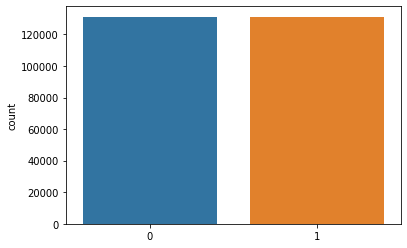

In [25]:
# dealing with the imbalnce dataset with imblearn library (SMOTE)

from imblearn.over_sampling import SMOTE
#SMOTE is an oversampling technique that generates synthetic samples
#from the dataset which increases the predictive power for minority classes.
#smote should only be used on the train data set

smote = SMOTE() 

# call the smote module only on the training sample
X_smote, y_smote = smote.fit_resample(X_train, y_train)


sns.countplot(y_smote) #plotting to see the data distribution of the target after using SMOTE

print(X_smote.shape)

### Standard Scaling

In [28]:
#scaling the data with standard scaler

# import module
from sklearn.preprocessing import StandardScaler

# scale features
scaler = StandardScaler()
   # standard scaler module
X_smote = scaler.fit_transform(X_smote) #call both fit and transform on the resampled training data

X_val = scaler.transform(X_val) #call just transfrom on the validation data




X_test = scaler.transform(test_set) #call just transfrom on the test data

### Building Models

### Sklearn Classifiers

In [29]:
#import from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  VotingClassifier 
from sklearn.linear_model import LogisticRegression #import the Logistic Regression from library


rdf = RandomForestClassifier(random_state = 42) #base random forest model

log = LogisticRegression() #base logistic regression model

voting = VotingClassifier(estimators = [('log',log), #build the voting model with logistic regression and random forest 
                                        #as the two base sub model
          ('rdf', rdf)],
         voting = 'soft')
          
          
voting.fit(X_smote, y_smote) #fit the classifier on the resampled training data

VotingClassifier(estimators=[('log',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rdf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                           

In [30]:
lg, rd = voting.estimators_ #get the estimators for the two sub model

#check performance of the voting classifier and the ones for the individuals

#print the score for the individual model
print(voting.score(X_val, y_val))
print(lg.score(X_val, y_val)) #score for the logistic model
print(rd.score(X_val, y_val)) #score for the random forest model

0.7773406766325728
0.7594481673404053
0.7642773813722564


In [31]:
#get the performance of the voting model on the prediction 
#as compared to the y_test values as classification report

from sklearn.metrics import classification_report
clf_v = classification_report(y_val, voting.predict(X_val))
print(clf_v)

              precision    recall  f1-score   support

           0       0.80      0.94      0.87     56260
           1       0.56      0.26      0.36     17458

    accuracy                           0.78     73718
   macro avg       0.68      0.60      0.61     73718
weighted avg       0.75      0.78      0.75     73718



In [32]:
#confusion matrix for the prediction

from sklearn.metrics import confusion_matrix
cv = confusion_matrix(y_val, voting.predict(X_val))
cv

array([[52689,  3571],
       [12843,  4615]])

### Xgboost model

In [33]:
import xgboost as xgb

xg = xgb.XGBClassifier() # generate the model
xg.fit(X_smote, y_smote) #fit the model on the resampled training data


#use the model to evaluate the performance on the test set
xgpred = xg.predict(X_val)

In [34]:
clf_x = classification_report(y_val, xgpred) #get the performance of the xgboost model on the 
#prediction as compared to the y_test values as classification report 
print(clf_x)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84     56260
           1       0.49      0.43      0.46     17458

    accuracy                           0.76     73718
   macro avg       0.66      0.65      0.65     73718
weighted avg       0.75      0.76      0.75     73718



In [35]:
#confusion matrix for the predictions using the xgboost model
cx = confusion_matrix(y_val, xgpred)
cx

array([[48375,  7885],
       [ 9920,  7538]])

### Sequential Model

In [43]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from datetime import datetime

In [44]:
model = Sequential()
  #hidden layer with 512 neurons
model.add(Dense(512, activation='relu', input_shape=(X_smote.shape[1],), name = 'hidden_layer1'))
model.add(Dropout(rate = 0.3))  #adding dropout layer to prevent overfitting.
model.add(Dense(128, activation= 'relu', name = 'hidden_layer2'))

model.add(Dense(32, activation= 'relu', name = 'hidden_layer3'))
model.add(Dense(1, activation='sigmoid', name = 'output_layer'))

In [45]:
model.compile(optimizer= 'Adam', loss= 'BinaryCrossentropy', metrics= ['accuracy', 'mse'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 512)               24064     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 93,889
Trainable params: 93,889
Non-trainable params: 0
_________________________________________________________________


In [47]:

#tensorboard
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

#define the early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [49]:

#training the model

history = model.fit(X_smote, y_smote, validation_data = (X_val, y_val), 
                    epochs = 100, batch_size = 32, 
                    verbose = 1, callbacks = [tensorboard_callback, es])

Epoch 1/100
8199/8199 [==============================] - 29s 3ms/step - loss: 0.3353 - accuracy: 0.8335 - mse: 0.1106 - val_loss: 0.4746 - val_accuracy: 0.7709 - val_mse: 0.1554
Epoch 2/100
8199/8199 [==============================] - 29s 4ms/step - loss: 0.3188 - accuracy: 0.8451 - mse: 0.1042 - val_loss: 0.4533 - val_accuracy: 0.7849 - val_mse: 0.1468
Epoch 3/100
8199/8199 [==============================] - 28s 3ms/step - loss: 0.3087 - accuracy: 0.8521 - mse: 0.1003 - val_loss: 0.4490 - val_accuracy: 0.7876 - val_mse: 0.1454
Epoch 4/100
8199/8199 [==============================] - 29s 3ms/step - loss: 0.3061 - accuracy: 0.8534 - mse: 0.0994 - val_loss: 0.4480 - val_accuracy: 0.7875 - val_mse: 0.1451
Epoch 5/100
8199/8199 [==============================] - 28s 3ms/step - loss: 0.3046 - accuracy: 0.8543 - mse: 0.0989 - val_loss: 0.4476 - val_accuracy: 0.7880 - val_mse: 0.1449
Epoch 6/100
8199/8199 [==============================] - 28s 3ms/step - loss: 0.3036 - accuracy: 0.8549 - mse:

Text(0.5, 1.0, 'Training and Validation Accuracy')

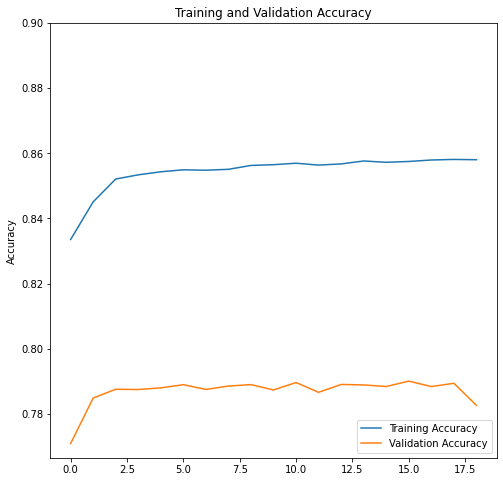

In [60]:
acc = history.history['accuracy'] # get history report of the model

val_acc = history.history['val_accuracy'] # get history of the validation set

loss = history.history['loss'] #get the history of the lossses recorded on the train set
val_loss = history.history['val_loss'] #get the history of the lossses recorded on the validation set

plt.figure(figsize=(8, 8)) # set figure size for the plot generated


plt.plot(acc, label='Training Accuracy') #plot accuracy curve for each train run
plt.plot(val_acc, label='Validation Accuracy') #plot accuracy curve for each validation run

plt.legend(loc='lower right')
plt.ylabel('Accuracy') #label name for y axis
plt.ylim([min(plt.ylim()),0.9]) #set limit for y axis
plt.title('Training and Validation Accuracy') #set title for the plot

(0.2898714393377304, 1.0)

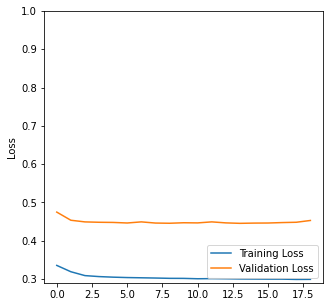

In [59]:
plt.figure(figsize=(5, 5)) # set figure size for the plot generated


plt.plot(loss, label='Training Loss') #plot loss curve for each train run
plt.plot(val_loss, label='Validation Loss') #plot loss curve for each validation run

plt.legend(loc='lower right')
plt.ylabel('Loss') #label name for y axis
plt.ylim([min(plt.ylim()), 1]) #set limit for y axis

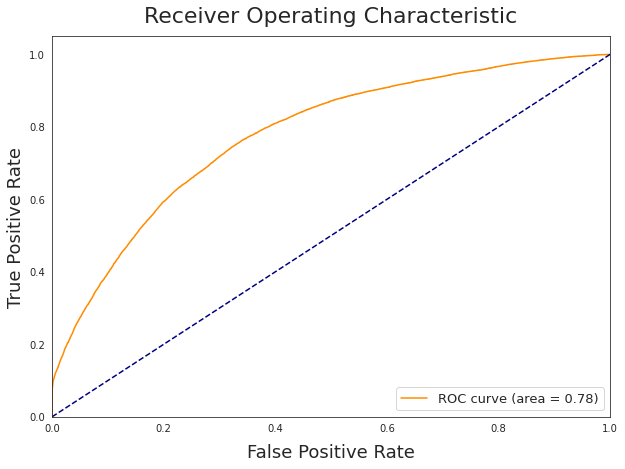

In [65]:
from sklearn.metrics import roc_curve, auc

#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
fpr_log, tpr_log, _ = roc_curve(y_val, model.predict(X_val))
roc_auc_log = auc(fpr_log, tpr_log)

#plot the AUC_ROC area
sns.set_style("white")
plt.figure(figsize=(10, 7)) #to set the size of the figure generated
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])#value range and limit on x axis
plt.ylim([0.0, 1.05]) #value range and limit on y axis

plt.xlabel('False Positive Rate',fontsize=18,labelpad =10) #Label for x axis
plt.ylabel('True Positive Rate',fontsize=18) #Label for y axis

plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02]) #Plot title
plt.legend(loc="lower right",fontsize=13)
plt.show()

In [62]:
# Predict the label of the test_images
pred = model.predict(X_test)
spred = np.argmax(pred, axis = 1) # pick the class with highest probability
# sequential model predicts by given probability for each of the classes
#np.argmax is called on the prediction to choose the class with the highest probability

In [73]:
output = pd.DataFrame({'ID': id_column, 'Is_Lead': spred})



# To download the csv file locally
from google.colab import files
output.to_csv('Credit_class.csv', index = False)         
files.download('Credit_class.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Conclusion
For this project, the Sequential Model was able to capture more details of the dataset and because overfitting was looked out for using early stopping, we were able to get a good validation accuracy as well.